# Fitting Data

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import math

from astropy.table import QTable
from astropy import units as u
from astropy import constants as const
from scipy.optimize import curve_fit

---

# Power on the Moon

<img src="https://uwashington-astro300.github.io/A300_images/ApolloRTG.jpg" alt="Apollo_ALSEP_RTG" width="700">

---

* The Apollo lunar mission deployed a series of experiments on the Moon.
* The experiment package was called the Apollo Lunar Surface Experiments Package [(ALSEP)](https://en.wikipedia.org/wiki/Apollo_Lunar_Surface_Experiments_Package)
* The ALSEP was powered by a radioisotope thermoelectric generator [(RTG)](https://en.wikipedia.org/wiki/Radioisotope_thermoelectric_generator)
* An RTG is basically a fist-sized slug of Pu-238 wrapped in a material that generates electric power when heated.
* Since the RTG is powered by a radioisotope, the output power decreases over time as the radioisotope decays.

---
## Read in the datafile

The data file `https://uwashington-astro300.github.io/A300_Data/Apollo_RTG.csv` contains the power output of the Apollo 12 RTG as a function of time.

The data colunms are

* [Day] - Days on the Moon
* [Power] - RTG power output in Watts

Read in the datafile as a astropy `QTable`

In [106]:
data = QTable.read('https://uwashington-astro300.github.io/A300_Data/Apollo_RTG.csv', 
                       format = 'ascii.csv')

Add units to the columns

In [107]:
data['Day'].unit = u.day
data['Power'].unit = u.watt

## Plot the Data

* Day vs. Power
* Fit the function with a (degree = 3) polynomial
* Plot the fit with the data
* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels)

In [108]:
# Defining X and Y Axis
x = data['Day']
y = data['Power']

# Creating Line of Best Fit
fit = np.polyfit(x.value, y.value, 3)
polyfit = np.poly1d(fit)

data['Fit'] = polyfit(x.value) * y.unit

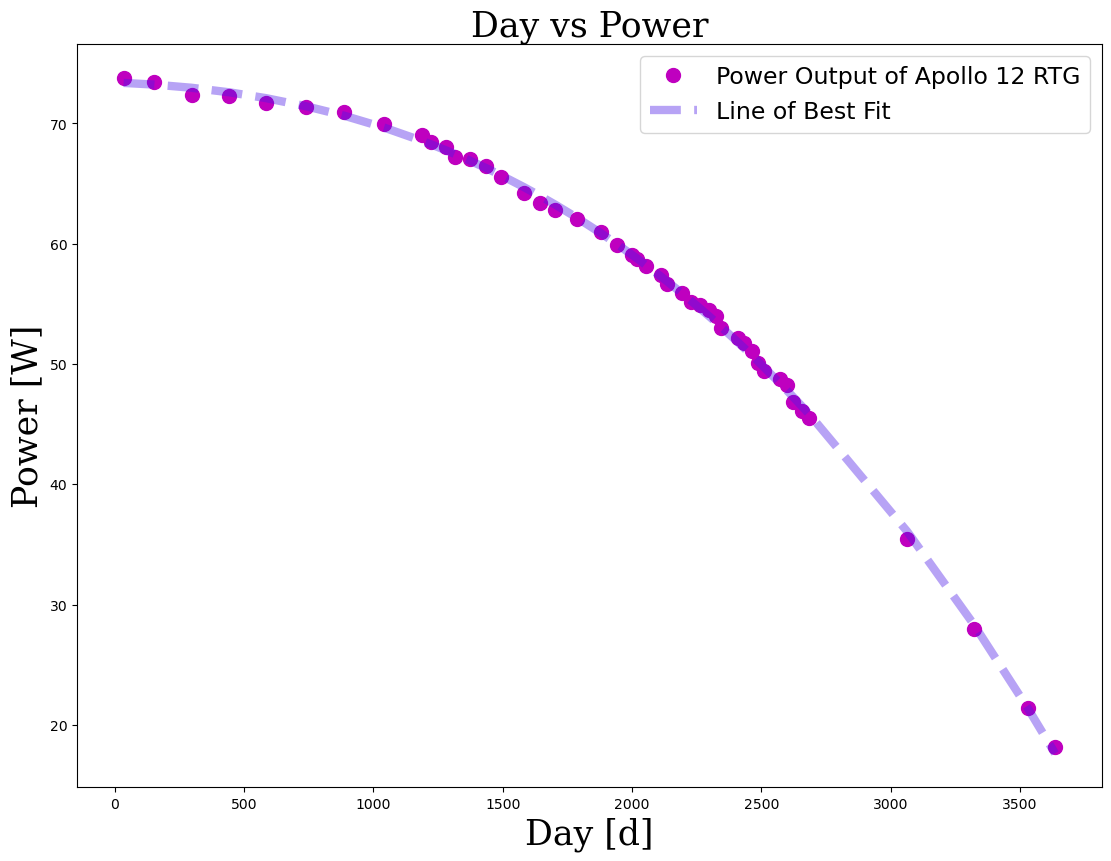

In [109]:
fig, dplot = plt.subplots(
    figsize = (11, 8.5), 
    constrained_layout = True
)

# Plot Labels
dplot.set_title(f"Day vs Power", fontfamily = 'serif', fontsize = 25)
dplot.set_xlabel(f"Day [{x.unit}]", fontfamily = 'serif', fontsize = 25)
dplot.set_ylabel(f"Power [{y.unit}]", fontfamily = 'serif', fontsize = 25)

# Graphing Data
dplot.plot(x, y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Power Output of Apollo 12 RTG"
        );

# Graphing Line of Best Fit
dplot.plot(x, data['Fit'],
        marker = "None",
        linewidth = 6,
        color = (0.3, 0.1, 0.9, 0.4),
        linestyle = '--',
        label = "Line of Best Fit")

# Plot Legend
dplot.legend(loc = 0, fontsize = 17)

## Power over time

* All of your answer should be formatted as sentences
* For example: `The power on day 0 is VALUE UNIT`
* Pay attention to the requested output units
* Do not pick the complex roots!

### 1 - What was the power output on Day 0?

In [110]:
# fitted_polynomial(X) ---> get Y
# (fitted_polynomial - Y).roots[0] ---> get X
# my_solutions[np.isreal(my_solutions)][0].real ---> get real number

In [111]:
f"At Day 0 {x.unit} then Power will be {polyfit(0):.1f} {y.unit}" 

'At Day 0 d then Power will be 73.4 W'

### 2 - How many YEARS after landing could you still power a 60 W lightbulb?

In [112]:
q2a = (polyfit - 60).roots
q2b = q2a[np.isreal(q2a)][0].real * u.d

In [113]:
f"After {q2b.to(u.yr):.1f} years, you can still power a 60 {y.unit} lightbulb." 

'After 5.3 yr years, you can still power a 60 W lightbulb.'

### 3 - How many YEARS after landing could you still power a 5 W USB device?

In [114]:
q3a = (polyfit - 5).roots
q3b = q3a[np.isreal(q2a)][0].real * u.d

In [115]:
f"After {q3b.to(u.yr):.1f} years, you can still power a 5 {y.unit} USB device." 

'After 10.8 yr years, you can still power a 5 W USB device.'

### 4 - How many YEARS after landing until the power output is 0 W?

In [116]:
q4a = (polyfit - 0).roots
q4b = q4a[np.isreal(q4a)][0].real * u.d

In [117]:
f"After {q4b.to(u.yr):.1f} years, the power output will be 0 {y.unit}." 

'After 11.2 yr years, the power output will be 0 W.'

---

# Fitting data to a function

* The datafile `https://uwashington-astro300.github.io/A300_Data/linedata.csv` contains two columns of data [no units]

#### Read in the Data as an astropy `Qtable`

In [118]:
df = QTable.read('https://uwashington-astro300.github.io/A300_Data/linedata.csv', 
                       format = 'ascii.csv')
df.columns

<TableColumns names=('wavelength','flux')>

#### Plot the Data

* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

In [119]:
df_x = df['wavelength']
df_y = df['flux']

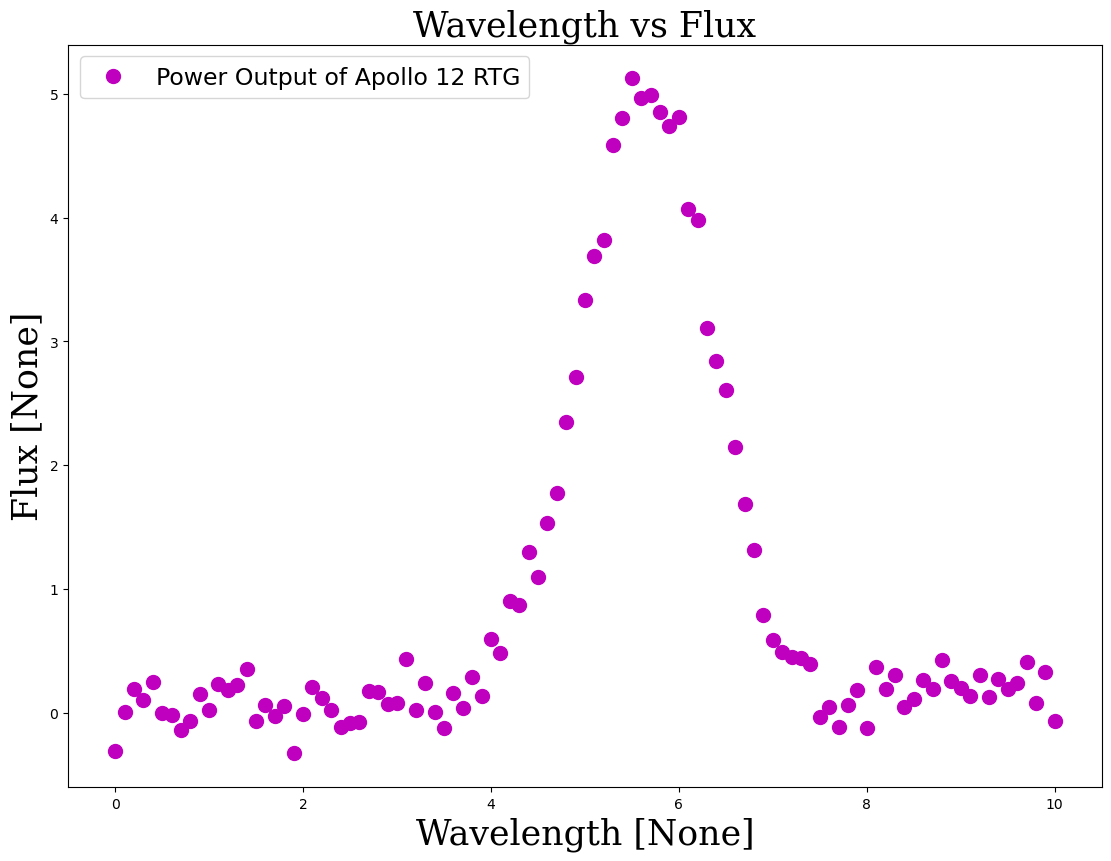

In [120]:
fig, dfplt = plt.subplots(
    figsize = (11, 8.5), 
    constrained_layout = True
)

# Plot Labels
dfplt.set_title(f"Wavelength vs Flux", fontfamily = 'serif', fontsize = 25)
dfplt.set_xlabel(f"Wavelength [{df_x.unit}]", fontfamily = 'serif', fontsize = 25)
dfplt.set_ylabel(f"Flux [{df_y.unit}]", fontfamily = 'serif', fontsize = 25)

# Graphing Data
dfplt.plot(df_x, df_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Power Output of Apollo 12 RTG"
        );

# Plot Legend
dfplt.legend(loc = 0, fontsize = 17)

----

#### Fit a gaussian of the form:

$$ \huge f(x) = A e^{-\frac{(x - C)^2}{W}} $$

* A = amplitude of the gaussian
* C = x-value of the central peak of the gaussian
* W = width of the gaussian
* Find the values `(A,C,W)` that best fit the data

In [121]:
def gaussian(x_value, amplitude, central, g_width):
    term = (-1) * ( ((x_value-central)**2) / g_width )
    f = amplitude * np.exp(term)
    return f

In [122]:
amp = 5.1
peak = 5.6
width = 3
guess = [amp, peak, width]


fitpars, error = curve_fit(
    gaussian, 
    df_x.value, 
    df_y.value, 
    p0 = guess
)
print(fitpars)

[5.07800669 5.65866119 0.97344345]


#### Plot the Data and the Fit on the same plot

* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

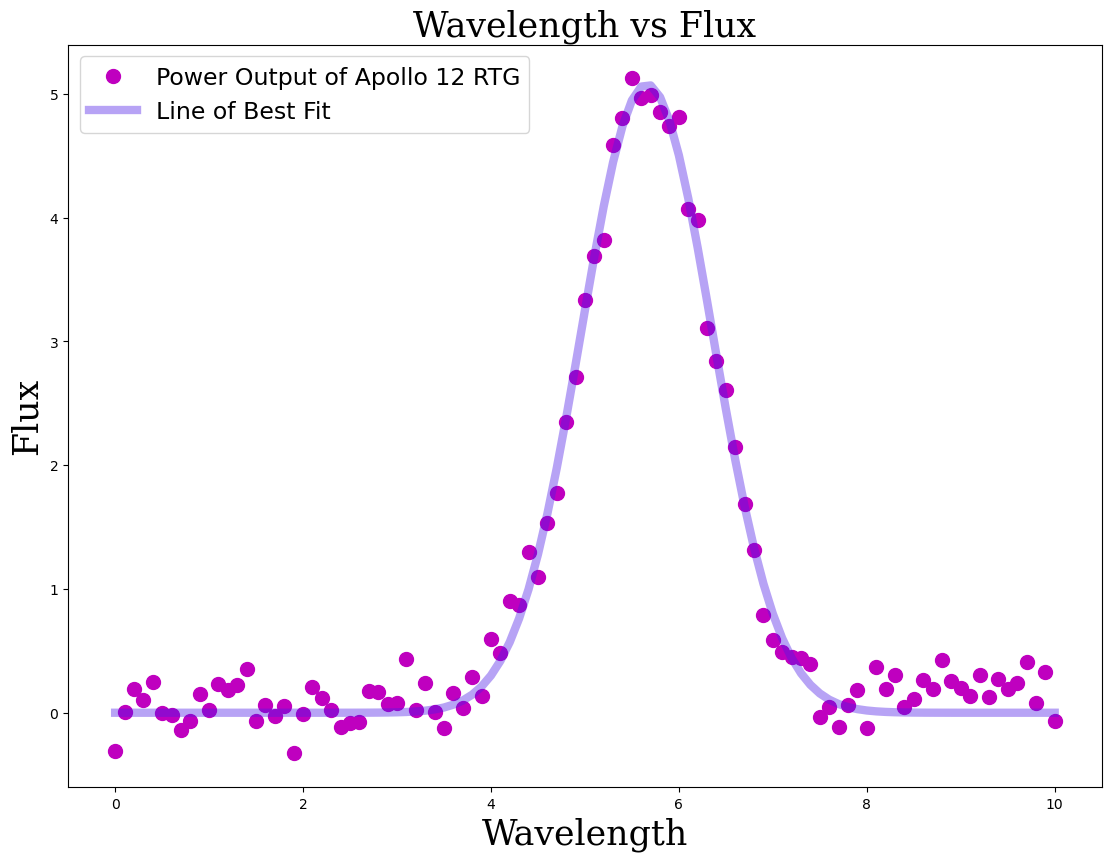

In [123]:
fig, dfplt = plt.subplots(
    figsize = (11, 8.5), 
    constrained_layout = True
)

# Plot Labels
dfplt.set_title(f"Wavelength vs Flux", fontfamily = 'serif', fontsize = 25)
dfplt.set_xlabel(f"Wavelength", fontfamily = 'serif', fontsize = 25)
dfplt.set_ylabel(f"Flux", fontfamily = 'serif', fontsize = 25)

# Graphing Data
dfplt.plot(df_x, df_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Power Output of Apollo 12 RTG"
        );

# Graphing Line of Best Fit
dfplt.plot(df_x, gaussian(df_x.value, *fitpars),
        color = (0.3, 0.1, 0.9, 0.4),
        marker = "None",
        linestyle = "-",
        linewidth = 6,
        label = "Line of Best Fit")

# Plot Legend
dfplt.legend(loc = 0, fontsize = 17)

---

# Stellar Spectra

#### The file `https://uwashington-astro300.github.io/A300_Data/StarSpectra_Data.csv` is a spectra of a main sequence star

* Col 1 - Wavelength `[angstroms]`
* Col 2 - Normalized Flux `[no units]`

#### Read in the Data as an astropy `Qtable`

In [124]:
spectra = QTable.read('https://uwashington-astro300.github.io/A300_Data/StarSpectra_Data.csv', 
                       format = 'ascii.csv')
spectra.columns

<TableColumns names=('wavelength','flux')>

#### Add units to the `Wavelength` column

In [125]:
spectra['wavelength'].unit = u.angstrom

#### Plot the Data

* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

In [126]:
x_specplt = spectra['wavelength']
y_specplt = spectra['flux']

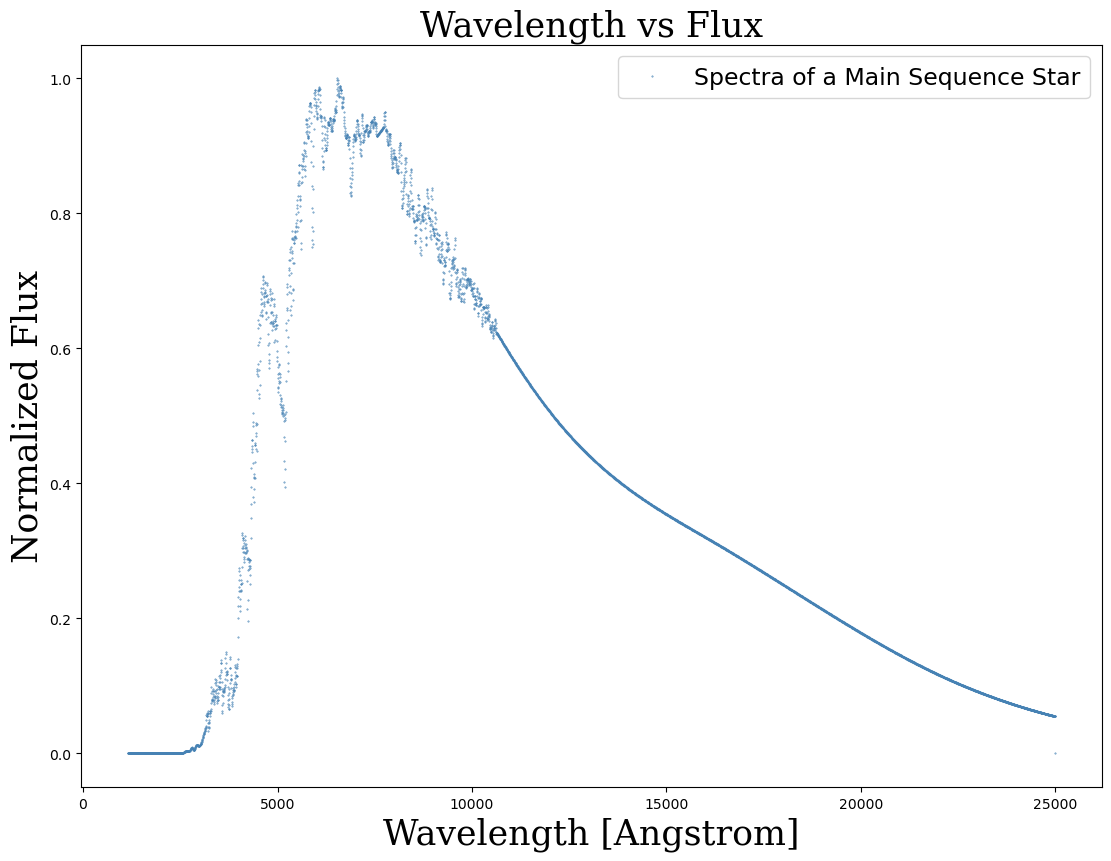

In [127]:
fig, specplt = plt.subplots(
    figsize = (11, 8.5), 
    constrained_layout = True
)

# Plot Labels
specplt.set_title(f"Wavelength vs Flux", fontfamily = 'serif', fontsize = 25)
specplt.set_xlabel(f"Wavelength [{x_specplt.unit}]", fontfamily = 'serif', fontsize = 25)
specplt.set_ylabel(f"Normalized Flux", fontfamily = 'serif', fontsize = 25)

# Graphing Data
specplt.plot(x_specplt, y_specplt,
        color = "steelblue",
        marker = ".",
        linestyle = "None",
        markersize = 0.8,
        label = "Spectra of a Main Sequence Star"
        );

# Plot Legend
specplt.legend(loc = 0, fontsize = 17)

### Find the wavelength where the Flux is at a maximum

In [128]:
peak = spectra[spectra['flux'] == spectra['flux'].max()]['wavelength'][0]
peak

<Quantity 6540. Angstrom>

### Use [Wien's law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law) to determine the temperature of the Star

$$ \huge \lambda_{peak} = \frac{b}{T} $$

* $\lambda_{peak}$ = peak wavelength
* b = Wien's Displacement Constant
* T = absolute temperature

* Use the Astropy units and constants - do not hardcode

In [129]:
abs_temp = (const.b_wien / peak).decompose()
abs_temp

<Quantity 4430.84396817 K>

### [Plank's Law](https://en.wikipedia.org/wiki/Planck%27s_law)

$$ \huge B_{\lambda}(\lambda, T) = (\frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{(\lambda k_B T)}} - 1}) $$

* [Plank's Law](https://en.wikipedia.org/wiki/Planck%27s_law) describes the spectra emitted by a blackbody at a temperature T
* You will want to look at the $\large \lambda$ version
* Hint: all of the units should cancel in the `exp()` part of the expression  
* Write a function to calculate the blackbody flux, at the above temperature, for all of your data_wavelength points
* Use the Astropy units and constants - do not hardcode
* Scale the blackbody flux to `[0->1]`
* Add a column to the table: `Blackbody`

In [130]:
# Write a function
def planck(wavelength, temp):
    x = np.exp( (const.h * const.c) / (wavelength * const.k_B * temp) )
    
    term1 = (2 * const.h * const.c**2) / wavelength**5
    term2 = 1 / (x - 1)
    
    B = term1 * term2
    return B.decompose()

In [131]:
# Apply the function
blackbody = planck(x_specplt, abs_temp) #.to(u.physical.radiance)
blackbody

<Quantity [3.23243947e+06, 3.57434001e+06, 3.94861126e+06, ...,
           4.58206600e+11, 4.57912117e+11, 4.57617865e+11] kg / (m s3)>

In [141]:
# Normalize and add column
def normalize(data):
    normal = (data - data.min()) / (data.max() - data.min())
    return normal

normbody = normalize(blackbody)
normbody

<Quantity [0.00000000e+00, 4.88812445e-08, 1.02390502e-07, ...,
           6.55089655e-02, 6.54668635e-02, 6.54247946e-02]>

In [142]:
spectra['blackbody'] = normbody
spectra[0:5]

wavelength,flux,blackbody
Angstrom,,
float64,float64,float64
1150.0,0.0,0.0
1155.0,0.0,4.888124453881595e-08
1160.0,0.0,1.0239050232118743e-07
1165.0,0.0,1.6091225585297915e-07
1170.0,0.0,2.2485817264300937e-07


### Plot the Data and the Blackbody fit on the same plot

* **Your blackbody fit should match the data pretty well.**
* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

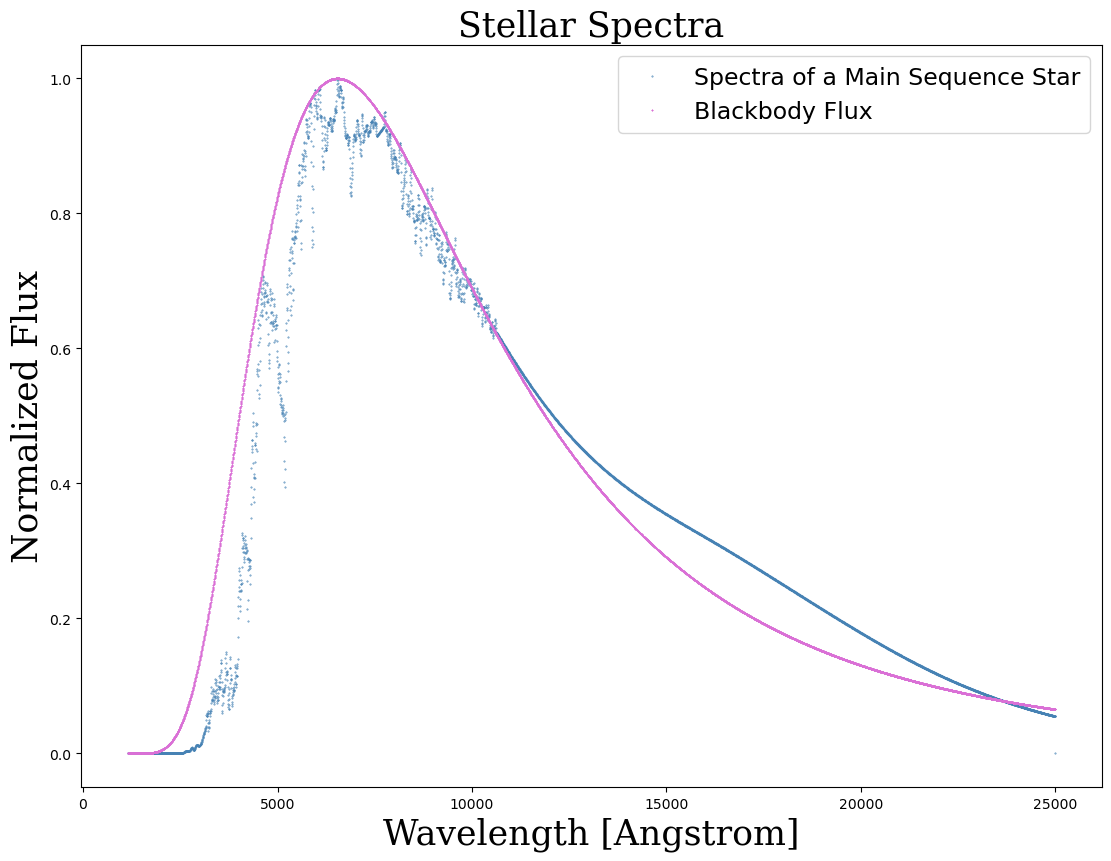

In [143]:
fig, specplt = plt.subplots(
    figsize = (11, 8.5), 
    constrained_layout = True
)

# Plot Labels
specplt.set_title(f"Stellar Spectra", fontfamily = 'serif', fontsize = 25)
specplt.set_xlabel(f"Wavelength [{x_specplt.unit}]", fontfamily = 'serif', fontsize = 25)
specplt.set_ylabel(f"Normalized Flux", fontfamily = 'serif', fontsize = 25)

# Graphing Data
specplt.plot(x_specplt, y_specplt,
        color = "steelblue",
        marker = ".",
        linestyle = "None",
        markersize = 0.8,
        label = "Spectra of a Main Sequence Star"
        );

# Graphing Blackbody Flux
specplt.plot(x_specplt, normbody,
        color = "orchid",
        marker = "x",
        linestyle = "None",
        markersize = 0.8,
        label = "Blackbody Flux"
        );

# Plot Legend
specplt.legend(loc = 0, fontsize = 17)

---
### Due Mon Feb 12 - 1 pm
- `File -> Download as -> HTML (.html)`
- `upload your .html file to the class Canvas page`